In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from sklearn import linear_model

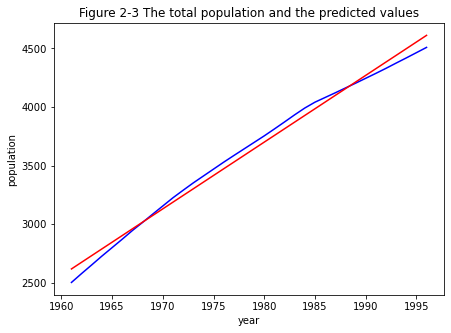

In [2]:
# Example 2.1
z = []

with open('../data/population.txt') as f:
    for line in f.readlines():
        for elem in line.rstrip().split(" "):
            if len(elem):
                z.append(float(elem))
                
pop = np.array(z) 
pop = np.round(pop / 10000)
ln_pop = np.log(z)
t = np.array(range(len(z)))
t2 = t * t

m1 = linear_model.LinearRegression()
m1.fit(t.reshape(-1, 1), pop)

z_ts = pd.DataFrame(np.vstack([pop, m1.intercept_ + m1.coef_*t]).T,
    index=pd.date_range("1960-01-01", periods=len(z), freq="y"),
    columns=["Zt", "Xt"]
)

fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(z_ts['Zt'], 'b')
ax.plot(z_ts['Xt'], 'r')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_major_locator(mdates.YearLocator(5)) 
ax.set_xlabel("year")
ax.set_ylabel("population")
ax.set_title("Figure 2-3 The total population and the predicted values")
plt.show()

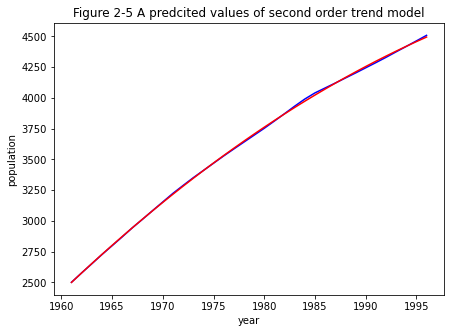

In [3]:
X = np.vstack([t, t2]).T
m2 = linear_model.LinearRegression()
m2.fit(X, pop)

z_ts = pd.DataFrame(np.hstack([pop.reshape(-1, 1), (m2.intercept_ + np.sum(X * m2.coef_, axis=1)).reshape(-1, 1)]),
    index=pd.date_range("1960-01-01", periods=len(z), freq="y"),
    columns=["Zt", "Xt"]
)

fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(z_ts['Zt'], 'b')
ax.plot(z_ts['Xt'], 'r')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_major_locator(mdates.YearLocator(5)) 
ax.set_xlabel("year")
ax.set_ylabel("population")
ax.set_title("Figure 2-5 A predcited values of second order trend model")
plt.show()

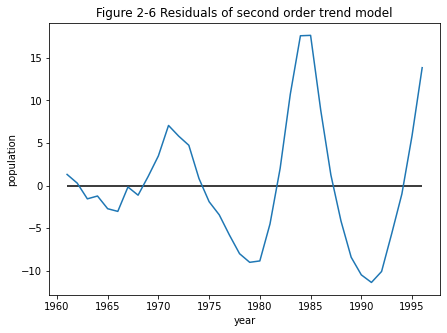

In [4]:
fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(z_ts['Zt'] - z_ts["Xt"])
ax.hlines(0, min(z_ts.index), max(z_ts.index), color="black")
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_major_locator(mdates.YearLocator(5)) 
ax.set_xlabel("year")
ax.set_ylabel("population")
ax.set_title("Figure 2-6 Residuals of second order trend model")
plt.show()

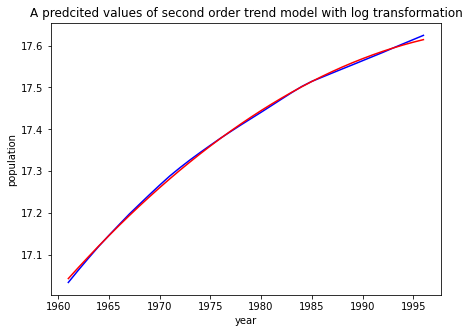

In [5]:
X = np.vstack([t, t2]).T
m2 = linear_model.LinearRegression()
m2.fit(X, ln_pop)

z_ts = pd.DataFrame(np.hstack([ln_pop.reshape(-1, 1), (m2.intercept_ + np.sum(X * m2.coef_, axis=1)).reshape(-1, 1)]),
    index=pd.date_range("1960-01-01", periods=len(z), freq="y"),
    columns=["Zt", "Xt"]
)

fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(z_ts['Zt'], 'b')
ax.plot(z_ts['Xt'], 'r')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_major_locator(mdates.YearLocator(5)) 
ax.set_xlabel("year")
ax.set_ylabel("population")
ax.set_title("A predcited values of second order trend model with log transformation")
plt.show()

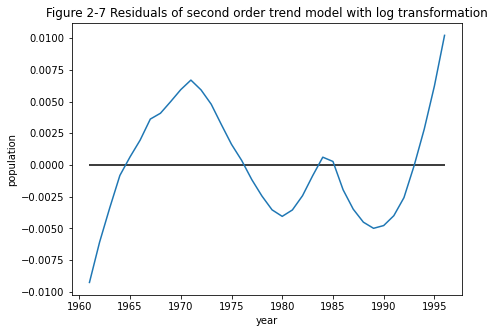

In [6]:
fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(z_ts['Zt'] - z_ts["Xt"])
ax.hlines(0, min(z_ts.index), max(z_ts.index), color="black")
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_major_locator(mdates.YearLocator(5)) 
ax.set_xlabel("year")
ax.set_ylabel("population")
ax.set_title("Figure 2-7 Residuals of second order trend model with log transformation")
plt.show()

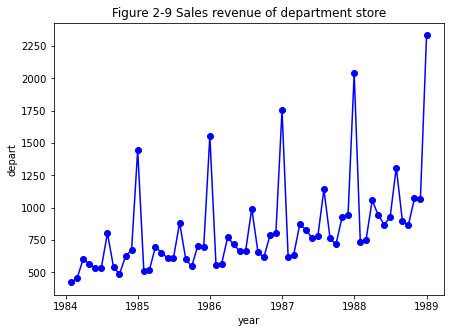

In [7]:
# Example 2.2
z = []

with open('../data/depart.txt') as f:
    for line in f.readlines():
        for elem in line.rstrip().split(" "):
            if len(elem):
                z.append(float(elem))
                
z_ts = pd.DataFrame(z,
    index=pd.date_range("1984-01-01", periods=len(z), freq="m"),
    columns=["Zt"]
)

fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(z_ts['Zt'], 'o-b')
ax.set_xlabel("year")
ax.set_ylabel("depart")
ax.set_title("Figure 2-9 Sales revenue of department store")
plt.show()

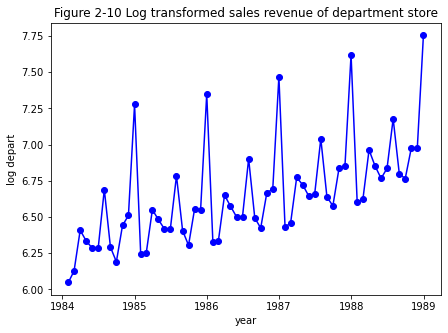

In [8]:
ln_dep = np.log(z)

z_ts = pd.DataFrame(ln_dep,
    index=pd.date_range("1984-01-01", periods=len(z), freq="m"),
    columns=["Zt"]
)

fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(z_ts['Zt'], 'o-b')
ax.set_xlabel("year")
ax.set_ylabel("log depart")
ax.set_title("Figure 2-10 Log transformed sales revenue of department store")
plt.show()

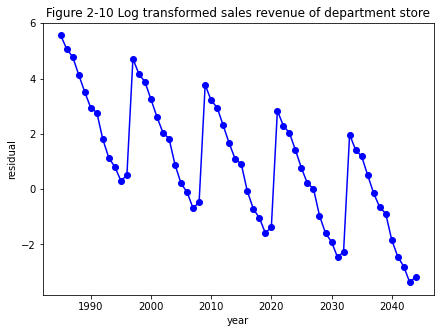

In [9]:
trend = np.array(list(range(len(z_ts))))
y = z_ts.index.month.values

X = np.vstack([trend, y]).T
reg = linear_model.LinearRegression(fit_intercept=False)
reg.fit(X, ln_dep)

z_ts = pd.DataFrame(np.hstack([ln_dep.reshape(-1, 1), (np.sum(X * reg.coef_, axis=1)).reshape(-1, 1)]),
    index=pd.date_range("1984-01-01", periods=len(z), freq="y"),
    columns=["Zt", "Xt"]
)

fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(z_ts['Zt'] - z_ts['Xt'], 'o-b')
ax.set_xlabel("year")
ax.set_ylabel("residual")
ax.set_title("Figure 2-10 Log transformed sales revenue of department store")
plt.show()

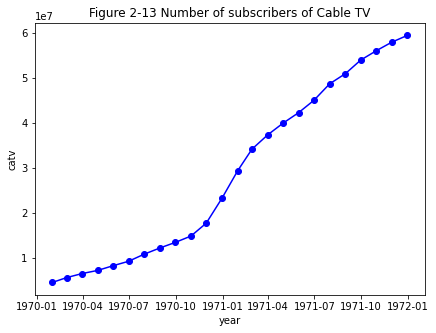

In [10]:
# Example 2.3
z = []

with open('../data/catv.txt') as f:
    for line in f.readlines():
        for elem in line.rstrip().split(" "):
            if len(elem):
                z.append(float(elem))

k = 70000000                
t = np.array(range(len(z)))

catv = np.array(z)
ln_catv = np.log(k / catv - 1)

z_ts = pd.DataFrame(catv,
    index=pd.date_range("1970-01-01", periods=len(z), freq="m"),
    columns=["Zt"]
)

fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(z_ts['Zt'], 'o-b')
ax.set_xlabel("year")
ax.set_ylabel("catv")
ax.set_title("Figure 2-13 Number of subscribers of Cable TV")
plt.show()

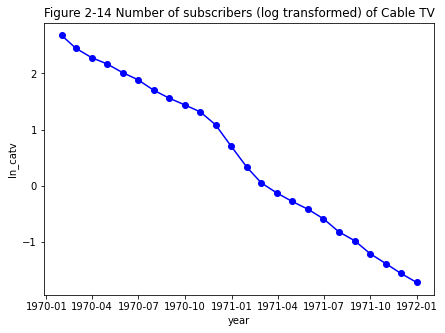

In [11]:
z_ts = pd.DataFrame(ln_catv,
    index=pd.date_range("1970-01-01", periods=len(z), freq="m"),
    columns=["Zt"]
)

fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(z_ts['Zt'], 'o-b')
ax.set_xlabel("year")
ax.set_ylabel("ln_catv")
ax.set_title("Figure 2-14 Number of subscribers (log transformed) of Cable TV")
plt.show()

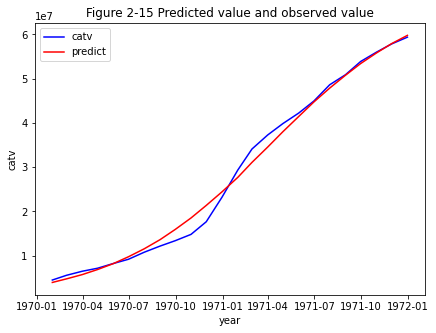

In [12]:
lm = linear_model.LinearRegression()
lm.fit(t.reshape(-1, 1), ln_catv)
pred = k / (np.exp(np.sum(lm.intercept_ + t.reshape(-1, 1) * lm.coef_, axis=1)) + 1)

z_ts = pd.DataFrame(np.hstack([catv.reshape(-1, 1), pred.reshape(-1, 1)]),
    index=pd.date_range("1970-01-01", periods=len(z), freq="m"),
    columns=["Zt", "Xt"]
)

fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(z_ts['Zt'], 'b', label="catv")
ax.plot(z_ts['Xt'], 'r', label="predict")
ax.set_xlabel("year")
ax.set_ylabel("catv")
ax.set_title("Figure 2-15 Predicted value and observed value")
plt.legend()
plt.show()

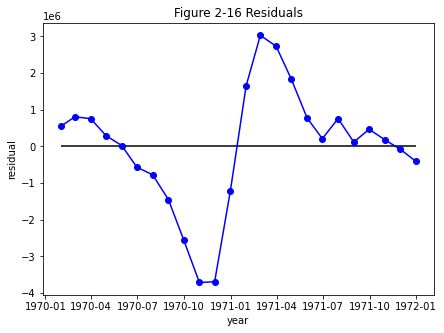

In [13]:
resid = catv - pred

z_ts = pd.DataFrame(resid,
    index=pd.date_range("1970-01-01", periods=len(z), freq="m"),
    columns=["Zt"]
)

fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(z_ts['Zt'], 'o-b')
ax.set_xlabel("year")
ax.set_ylabel("residual")
ax.set_title("Figure 2-16 Residuals")
ax.hlines(0, min(z_ts.index), max(z_ts.index), "black")
plt.show()


In [14]:
# from statsmodels.tsa.arima_model import ARIMA

# z = []

# with open('../data/depart.txt') as f:
#     for line in f.readlines():
#         for elem in line.rstrip().split(" "):
#             if len(elem):
#                 z.append(float(elem))

# ln_dep = np.log(z)
# trend = np.array(list(range(len(z_ts))))
# y = z_ts.index.month.values

# X = np.vstack([trend, y]).T
# reg = linear_model.LinearRegression(fit_intercept=False)
# reg.fit(X, ln_dep)

# z_ts = pd.DataFrame(z,
#     index=pd.date_range("1984-01-01", periods=len(z), freq="m"),
#     columns=["Zt"]
# )

# model = ARIMA(series, order=(0,1,1))
# model_fit = model.fit(trend='c',full_output=True, disp=1)

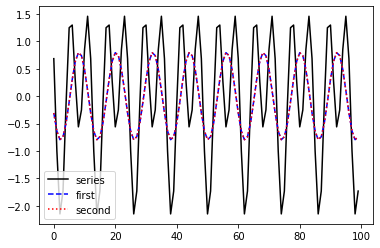

In [15]:
# Figure 2.8 주기 성분을 갖는 시계열

import math

n = 100
t = np.arange(n)
a1 = -0.8
a2 = 1.4
phi_1 = math.pi / 8
phi_2 = 3 * math.pi / 4

first = a1 * np.sin(math.pi * t / 6 + phi_1)
second = a2 * np.sin(math.pi * t / 3 + phi_2)

z = first + second

plt.plot(t, z, color="black", linestyle="-", label="series")
plt.plot(t, first, color="blue", linestyle="--", label="first")
plt.plot(t, first, color="red", linestyle=":", label="second")
plt.legend()
plt.show()

/var/folders/nw/x1lqw0rx1mj698bqcgqxhk880000gn/T/ipykernel_93223/512967855.py:6: RuntimeWarning: divide by zero encountered in true_divide
  z1 = np.exp(b0 + b1 / t)


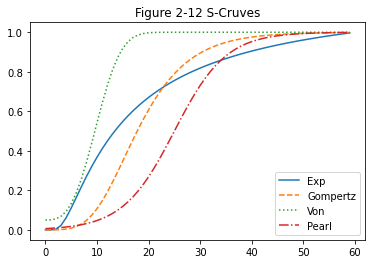

In [16]:
# Figure 2.12

b0 = 0.2
b1 = -12
t = np.arange(60)
z1 = np.exp(b0 + b1 / t)

# Gompertz
b0 = 10
b1 = 0.15
k = 1
z2 = k * np.exp(-b0 * np.exp(-b1 * t))

# Von
b0 = 0.95
b1 = 0.09
z3 = 1 - b0 * np.exp((-b1*t)**3)

# Perl
b0 = 5
b1 = -0.2
k = 1
z4 = k / (1 + np.exp(b0 + b1 * t))

plt.plot(t, z1, linestyle="-", label="Exp")
plt.plot(t, z2, linestyle="--", label="Gompertz")
plt.plot(t, z3, linestyle=":", label="Von")
plt.plot(t, z4, linestyle="-.", label="Pearl")
plt.title("Figure 2-12 S-Cruves")
plt.legend()
plt.show()